# Primary Biliary Cirrhosis Clinical Data: Exploratory Data and Survival Analyses

Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption. The data provided is sourced from a Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984. During 1974 to 1984, 424 PBC patients referred to the Mayo Clinic qualified for the randomized placebo-controlled trial testing the drug D-penicillamine. Of these, the initial 312 patients took part in the trial and have mostly comprehensive data. The remaining 112 patients didn't join the clinical trial but agreed to record basic metrics and undergo survival tracking. Six of these patients were soon untraceable after their diagnosis, leaving data for 106 of these individuals in addition to the 312 who were part of the randomized trial.

We are asked to answer to the following questions:

-  Conduct a study on the relationships that exist between the factors
considered to explain survival

- Determine the factors that influence survival time of cirrhosis patients

- Are there significant differences in survival times between males and
females? Do males and females exhibit different relationships between
platelet counts and survival?

### I. Data Preprocessing, Selection Bias & Exploratory Data Analysis (EDA)

In [1]:
all_data <- read.csv("/Users/oyku/Documents/medtec_II/stats/stats_2024-2025/project/dataset_3_cirrhosis.csv") # All patients
trial_data <- subset(all_data, Drug %in% c("D-penicillamine", "Placebo"))  # Trial participants
non_trial_data <- subset(all_data, is.na(Drug))  # Non-trial participants

#### 1.	Distinguishing the Common and Unique Variables for both groups

    Common factors

    •⁠ Categorical
    Edema (N, Y, S), Stage (1, 2, 3, 4), Sex (M, F)

    •⁠ ⁠Numerical Continuous
    Age, Bilirubin, Albumin, Platelets, Prothrombin, N-Days

    Unique factors

    Ascites, Hepatomegaly, Spiders, Cholesterol, Copper, Alk_Phos, SGOT, Triglycerides

In [2]:
numeric_vars <- c("N_Days", "Age", "Bilirubin", "Cholesterol", "Albumin", 
                  "Copper", "Alk_Phos", "SGOT", "Triglycerides", 
                  "Platelets", "Prothrombin")

categorical_vars <- c("Stage", "Edema", "Sex", "Drug")

#### 2.	Quick Screening of Continuous Variables
  
    To see which variables we have to take into consideration for the survival analysis, we have to visualize and compare their significance to the survival of both groups (in trial and not in trial).
    We also need to check the sample size of both groups because some possible tests may be only used when sample sizes are similar. 

In [3]:
n_all <- nrow(data)

# Sample size for trial participants
n_trial <- nrow(subset(all_data, Drug %in% c("D-penicillamine", "Placebo")))

# Sample size for non-trial participants
n_non_trial <- nrow(subset(all_data, is.na(Drug)))

# Print the sample sizes
cat("Total sample size:", n_all, "\n")
cat("Trial group size:", n_trial, "\n")
cat("Non-trial group size:", n_non_trial, "\n")

Total sample size: 418 
Trial group size: 312 
Non-trial group size: 106 


As seen here, our in trial and not in trial groups vary a lot in size. We will be using Mann Whitney U Tests that are less sensitive to unbalanced sample sizes.

We can still use the Shapiro Test for normality because n>30 for all groups.

Let's see if the data is normal with Shapiro-Wilk (a very small p-value (p<0.05) indicates that the data is not normally distributed). 
Then, we will use a Mann-Whitney U Test (compares the distributions (or medians) of the two groups.) 

- p<0.05: The difference between the groups is statistically significant 
- p≥0.05: No statistically significant difference 


In [11]:
for (var in numeric_vars) {
  cat("\n### Analyzing:", var, "###\n")
  
  # Check sample sizes for each group
  n_trial <- sum(!is.na(trial_data[[var]]))
  n_non_trial <- sum(!is.na(non_trial_data[[var]]))
  cat("Sample size (Trial Group):", n_trial, "\n")
  cat("Sample size (Non-Trial Group):", n_non_trial, "\n")
  
  # Shapiro-Wilk Test for Normality (only if sample size >= 3)
  if (n_trial >= 3) {
    shapiro_trial <- shapiro.test(trial_data[[var]])
    cat("Trial Group - Shapiro-Wilk Test: W =", shapiro_trial$statistic, ", p =", shapiro_trial$p.value, "\n")
  } else {
    cat("Trial Group - Skipped Shapiro-Wilk Test (sample size < 3)\n")
  }
  
  if (n_non_trial >= 3) {
    shapiro_non_trial <- shapiro.test(non_trial_data[[var]])
    cat("Non-Trial Group - Shapiro-Wilk Test: W =", shapiro_non_trial$statistic, ", p =", shapiro_non_trial$p.value, "\n")
  } else {
    cat("Non-Trial Group - Skipped Shapiro-Wilk Test (sample size < 3)\n")
  }
  
  # Mann-Whitney U Test (proceed regardless of sample size, but ensure both groups have data)
  if (n_trial >= 1 & n_non_trial >= 1) {
    wilcox_result <- wilcox.test(trial_data[[var]], non_trial_data[[var]], na.rm = TRUE)
    cat("Mann-Whitney U Test: W =", wilcox_result$statistic, ", p =", wilcox_result$p.value, "\n")
  } else {
    cat("Mann-Whitney U Test skipped (insufficient data in one or both groups)\n")
  }
}


### Analyzing: N_Days ###
Sample size (Trial Group): 312 
Sample size (Non-Trial Group): 106 
Trial Group - Shapiro-Wilk Test: W = 0.9718756 , p = 8.836807e-06 
Non-Trial Group - Shapiro-Wilk Test: W = 0.9514323 , p = 0.0006893053 
Mann-Whitney U Test: W = 19660 , p = 0.003653022 

### Analyzing: Age ###
Sample size (Trial Group): 312 
Sample size (Non-Trial Group): 106 
Trial Group - Shapiro-Wilk Test: W = 0.9900426 , p = 0.03211848 
Non-Trial Group - Shapiro-Wilk Test: W = 0.9799726 , p = 0.1097857 
Mann-Whitney U Test: W = 13837 , p = 0.01203227 

### Analyzing: Bilirubin ###
Sample size (Trial Group): 312 
Sample size (Non-Trial Group): 106 
Trial Group - Shapiro-Wilk Test: W = 0.6213971 , p = 1.15595e-25 
Non-Trial Group - Shapiro-Wilk Test: W = 0.6542411 , p = 1.907513e-14 
Mann-Whitney U Test: W = 16696.5 , p = 0.8815394 

### Analyzing: Cholesterol ###
Sample size (Trial Group): 284 
Sample size (Non-Trial Group): 0 
Trial Group - Shapiro-Wilk Test: W = 0.6445413 , p = 6.42340

##### Results and Conclusions for Common Continuous Variables

•	N-Days

    o W=19660, p=0.00365: Significant difference between groups.
    
    o Survival times differ significantly between trial and non-trial groups, with non-trial patients potentially having shorter survival.
    
•	Age

    o W=13837, p=0.01203: Significant difference between groups.
    
    o There is a significant age difference between trial and non-trial groups. Non-trial patients may be older, potentially affecting survival outcomes.
    
•	Bilirubin

    o W=16696.5, p=0.88154: No significant difference between groups.
    
    o Bilirubin is a critical marker of liver dysfunction but does not differ significantly between trial and non-trial groups.
    
    o The lack of group-level difference does not diminish its clinical importance for survival prediction.
    
•	Albumin

    o W=18745.5, p=0.0398: Significant difference between groups.
    
    o Albumin levels differ significantly between trial and non-trial groups. Non-trial patients may have lower levels, indicating worse liver function.
    
•	Platelets

    o W=17599.5, p=0.0208: Significant difference between groups.
    
    o Significant differences in platelet counts suggest worse disease severity in the non-trial group.
    
•	Prothrombin

    o W=15848.5, p=0.7236: No significant difference between groups.
    
    o While Prothrombin reflects liver function, no significant difference exists between trial and non-trial groups.


#### 3.	Quick Screening for Common Categorical Variables
For categorical variables, we will be using the Chi-Square Test to compare the observed frequency distribution of a categorical variable between groups.


In [13]:
# Perform Chi-Square test for Stage
combined_stage <- c(trial_data$Stage, non_trial_data$Stage)
group_stage <- c(rep("Trial", nrow(trial_data)), rep("Non-Trial", nrow(non_trial_data)))
chisq_stage <- chisq.test(table(combined_stage, group_stage))
cat("\n### Chi-Square Test for Stage ###\n")
print(chisq_stage)

# Perform Chi-Square test for Edema
combined_edema <- c(trial_data$Edema, non_trial_data$Edema)
group_edema <- c(rep("Trial", nrow(trial_data)), rep("Non-Trial", nrow(non_trial_data)))
chisq_edema <- chisq.test(table(combined_edema, group_edema))
cat("\n### Chi-Square Test for Edema ###\n")
print(chisq_edema)


### Chi-Square Test for Stage ###

	Pearson's Chi-squared test

data:  table(combined_stage, group_stage)
X-squared = 0.66527, df = 3, p-value = 0.8813


### Chi-Square Test for Edema ###

	Pearson's Chi-squared test

data:  table(combined_edema, group_edema)
X-squared = 8.5899, df = 2, p-value = 0.01364



##### Results and Conclusions for Common Categorical Variables

•	Stage

    o X-squared = 0.66527, df = 3, p-value = 0.8813: The difference in the distribution of Stage between trial and non-trial groups is not statistically significant.

    o This indicates that the proportions of patients in different Stage categories (e.g., Stage 1, Stage 2, etc.) are similar across trial and non-trial groups.

•	Edema

    o X-squared = 8.5899, df = 2, p-value = 0.01364: The difference in the distribution of Edema between trial and non-trial groups is statistically significant.

    o Trial participants have more severe edema (e.g., Y: Edema despite diuretic therapy), reflecting a sicker population in the trial.

    o Investigate whether Edema influences survival and whether non-trial patients with severe edema have worse outcomes.


### II.	Understanding the Survival Significance of Each Variable

#### Categorical Variables

For our common categorical variables (Stage, Edema, Sex), we perform Kaplan-Meier survival analysis to visualize survival trends across categories. Then, we conduct log-rank tests to confirm whether the differences in survival probabilities are statistically significant.

In [15]:
library(survival)
library(survminer)

# Create survival objects for Trial and Non-Trial Groups
trial_surv <- Surv(trial_data$N_Days, trial_data$Status == "D")  # Trial Group
non_trial_surv <- Surv(non_trial_data$N_Days, non_trial_data$Status == "D")  # Non-Trial Group

##### a.  Stratifying by Stage (1, 2, 3, 4): Comparing survival probabilities for patients in different cirrhosis stages.

In [17]:
# Log-Rank Test for Stage
cat("\n### Log-Rank Test for Stage ###\n")
log_rank_trial_stage <- survdiff(Surv(N_Days, Status == "D") ~ Stage, data = trial_data)
log_rank_non_trial_stage <- survdiff(Surv(N_Days, Status == "D") ~ Stage, data = non_trial_data)

cat("Trial Group:\n")
print(log_rank_trial_stage)

cat("Non-Trial Group:\n")
print(log_rank_non_trial_stage)


### Log-Rank Test for Stage ###
Trial Group:
Call:
survdiff(formula = Surv(N_Days, Status == "D") ~ Stage, data = trial_data)

          N Observed Expected (O-E)^2/E (O-E)^2/V
Stage=1  16        1      9.9      8.00      8.78
Stage=2  67       16     32.3      8.22     11.17
Stage=3 120       43     51.2      1.30      2.22
Stage=4 109       65     31.6     35.17     47.84

 Chisq= 53.8  on 3 degrees of freedom, p= 1e-11 
Non-Trial Group:
Call:
survdiff(formula = Surv(N_Days, Status == "D") ~ Stage, data = non_trial_data)

n=100, 6 osservazioni eliminate a causa di valori mancanti.

         N Observed Expected (O-E)^2/E (O-E)^2/V
Stage=1  5        1     1.63     0.246      0.26
Stage=2 25        7    10.88     1.384      2.23
Stage=3 35        5    10.57     2.937      4.52
Stage=4 35       19     8.91    11.416     16.03

 Chisq= 16.2  on 3 degrees of freedom, p= 0.001 


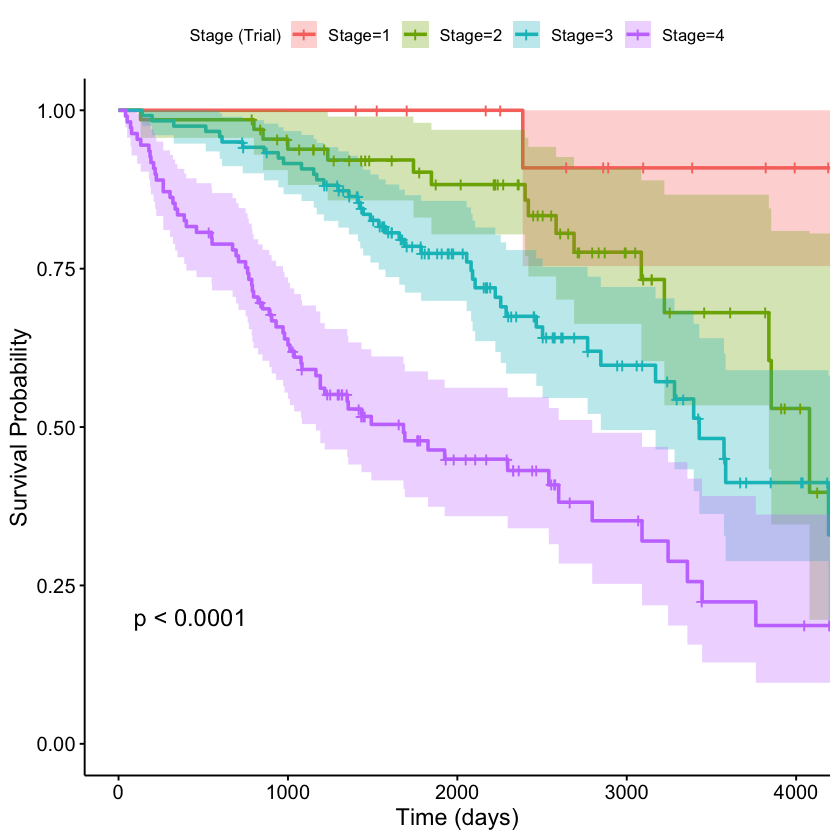

In [33]:
# Kaplan-Meier Survival Curves by Stage
# Trial Group
km_fit_trial_stage <- survfit(trial_surv ~ Stage, data = trial_data)
km_plot_trial_stage <- ggsurvplot(km_fit_trial_stage, data = trial_data, pval = TRUE,
                                  conf.int = TRUE, legend.title = "Stage (Trial)",
                                  risk.table = FALSE, xlab = "Time (days)", ylab = "Survival Probability")

print(km_plot_trial_stage)


•	Patients in Stage 1 have the highest survival probabilities, with a slow decline over time. Patients in Stage 4 have the steepest survival curve, indicating significantly worse survival probabilities.

•	Log Rank showed Chisq = 127 on 2 degrees of freedom, p= <2e-16. This confirms that the survival differences between stages are statistically significant.

•	Stage is a strong predictor of survival for patients included in the trial. As the stage progresses from 1 to 4, survival outcomes worsen, reflecting disease severity.


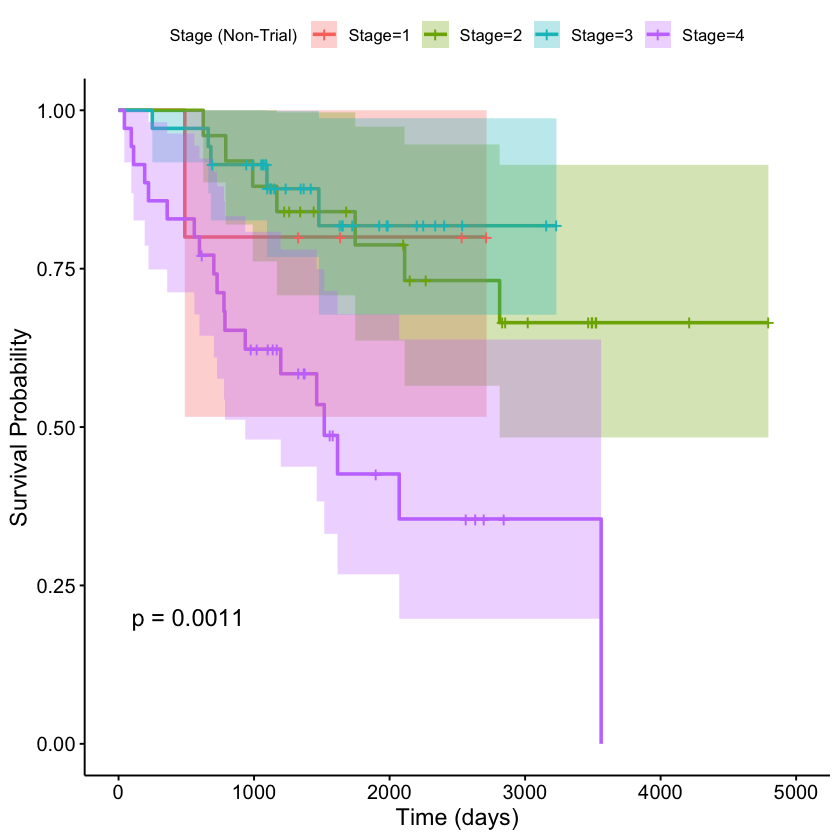

In [35]:
# Non-Trial Group
km_fit_non_trial_stage <- survfit(non_trial_surv ~ Stage, data = non_trial_data)
km_plot_non_trial_stage <- ggsurvplot(km_fit_non_trial_stage, data = non_trial_data, pval = TRUE,
                                      conf.int = TRUE, legend.title = "Stage (Non-Trial)",
                                      risk.table = FALSE, xlab = "Time (days)", ylab = "Survival Probability")

print(km_plot_non_trial_stage)


•	Similar to the trial group, patients in Stage 1 have the best survival outcomes and patients in Stage 4 have the worst survival probabilities. However, the survival probabilities for all stages appear lower overall compared to the trial group.

•	Log Rank showed Chisq = 6.3 on 1 degrees of freedom, p= 0.01. The survival differences between the groups are indeed statistically significant.

•	Stage remains a strong predictor of survival for non-trial patients. Survival outcomes are consistently worse for non-trial participants compared to trial participants, potentially reflecting differences in baseline health or selection criteria.


##### b.	Stratify by Edema (N, S, Y): Compare survival probabilities for patients with no edema, edema resolved by diuretics, or persistent edema.

In [19]:
# Log-Rank Test for Edema
cat("\n### Log-Rank Test for Edema ###\n")
log_rank_trial_edema <- survdiff(Surv(N_Days, Status == "D") ~ Edema, data = trial_data)
log_rank_non_trial_edema <- survdiff(Surv(N_Days, Status == "D") ~ Edema, data = non_trial_data)

cat("Trial Group:\n")
print(log_rank_trial_edema)

cat("Non-Trial Group:\n")
print(log_rank_non_trial_edema)


### Log-Rank Test for Edema ###
Trial Group:
Call:
survdiff(formula = Surv(N_Days, Status == "D") ~ Edema, data = trial_data)

          N Observed Expected (O-E)^2/E (O-E)^2/V
Edema=N 263       89   113.38      5.24     56.76
Edema=S  29       17     9.20      6.61      7.15
Edema=Y  20       19     2.42    113.48    117.00

 Chisq= 127  on 2 degrees of freedom, p= <2e-16 
Non-Trial Group:
Call:
survdiff(formula = Surv(N_Days, Status == "D") ~ Edema, data = non_trial_data)

         N Observed Expected (O-E)^2/E (O-E)^2/V
Edema=N 91       27    31.82     0.729      6.33
Edema=S 15        9     4.18     5.544      6.33

 Chisq= 6.3  on 1 degrees of freedom, p= 0.01 


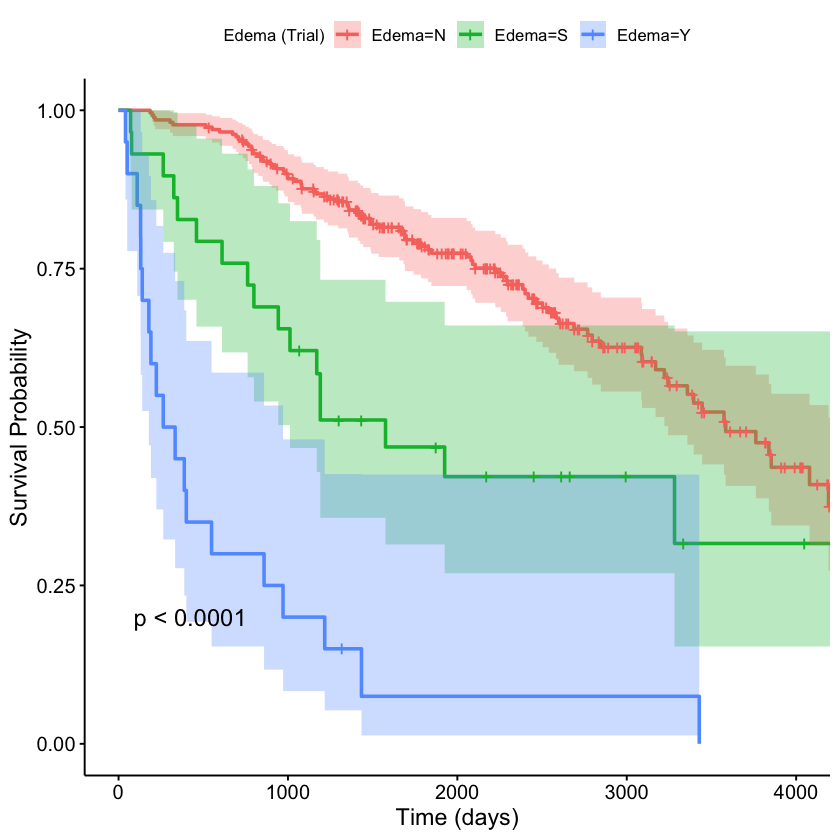

In [36]:
# Kaplan-Meier for Edema
# Trial Group
km_fit_trial_edema <- survfit(trial_surv ~ Edema, data = trial_data)
km_plot_trial_edema <- ggsurvplot(km_fit_trial_edema, data = trial_data, pval = TRUE,
                                  conf.int = TRUE, legend.title = "Edema (Trial)",
                                  risk.table = FALSE, xlab = "Time (days)", ylab = "Survival Probability")
print(km_plot_trial_edema)

•	Patients without edema (N) have the highest survival probabilities, with a slower decline in survival over time. Patients with persistent edema despite diuretics (Y) has the steepest decline in survival probabilities, indicating significantly worse survival outcomes.

•	Log Rank shows Chisq = 127 on 2 degrees of freedom, p= <2e-16 which indicates that the differences in survival across the three groups are statistically significant.

•	Edema is a strong predictor of survival in the trial group. This stratification is likely influenced by the severity of disease, as persistent edema reflects more advanced liver dysfunction.

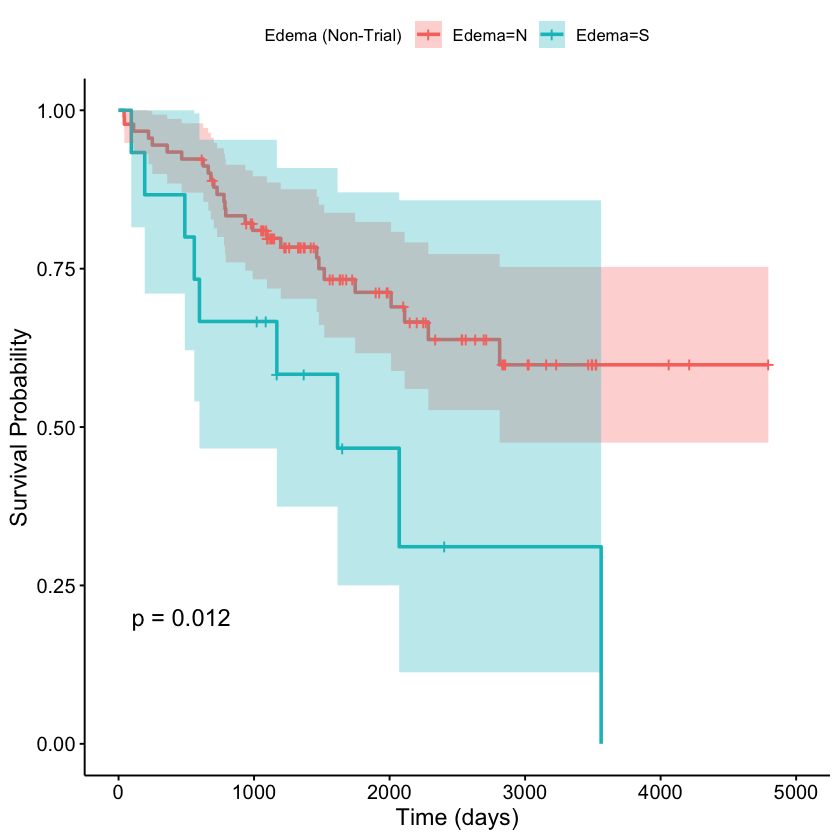

In [37]:
# Non-Trial Group
km_fit_non_trial_edema <- survfit(non_trial_surv ~ Edema, data = non_trial_data)
km_plot_non_trial_edema <- ggsurvplot(km_fit_non_trial_edema, data = non_trial_data, pval = TRUE,
                                      conf.int = TRUE, legend.title = "Edema (Non-Trial)",
                                      risk.table = FALSE, xlab = "Time (days)", ylab = "Survival Probability")

print(km_plot_non_trial_edema)

•	Patients without edema (N) have the highest survival probabilities, similar to the trial group. Patients with edema resolved by diuretics show worse survival probabilities compared to those without edema, with a steeper decline over time.

•	Log Rank shows Chisq = 6.3 on 1 degrees of freedom, p= 0.01, indicating that the differences in survival probabilities between the two groups are statistically significant, though less dramatic than in the trial group.

•	Even in the non-trial group, edema remains an important factor affecting survival. The absence of Edema = Y in this group suggests that the non-trial population doesn’t include the sickest patients with persistent edema, or data for this category was not captured.


##### c.	Stratify by Sex (F, M): Compare survival probabilities for males and females.

In [21]:
# Log-Rank Test for Sex
cat("\n### Log-Rank Test for Sex ###\n")
log_rank_trial_sex <- survdiff(Surv(N_Days, Status == "D") ~ Sex, data = trial_data)
log_rank_non_trial_sex <- survdiff(Surv(N_Days, Status == "D") ~ Sex, data = non_trial_data)

cat("Trial Group:\n")
print(log_rank_trial_sex)

cat("Non-Trial Group:\n")
print(log_rank_non_trial_sex)


### Log-Rank Test for Sex ###
Trial Group:
Call:
survdiff(formula = Surv(N_Days, Status == "D") ~ Sex, data = trial_data)

        N Observed Expected (O-E)^2/E (O-E)^2/V
Sex=F 276      103    110.4     0.494      4.27
Sex=M  36       22     14.6     3.728      4.27

 Chisq= 4.3  on 1 degrees of freedom, p= 0.04 
Non-Trial Group:
Call:
survdiff(formula = Surv(N_Days, Status == "D") ~ Sex, data = non_trial_data)

       N Observed Expected (O-E)^2/E (O-E)^2/V
Sex=F 98       34    33.19     0.020     0.258
Sex=M  8        2     2.81     0.236     0.258

 Chisq= 0.3  on 1 degrees of freedom, p= 0.6 


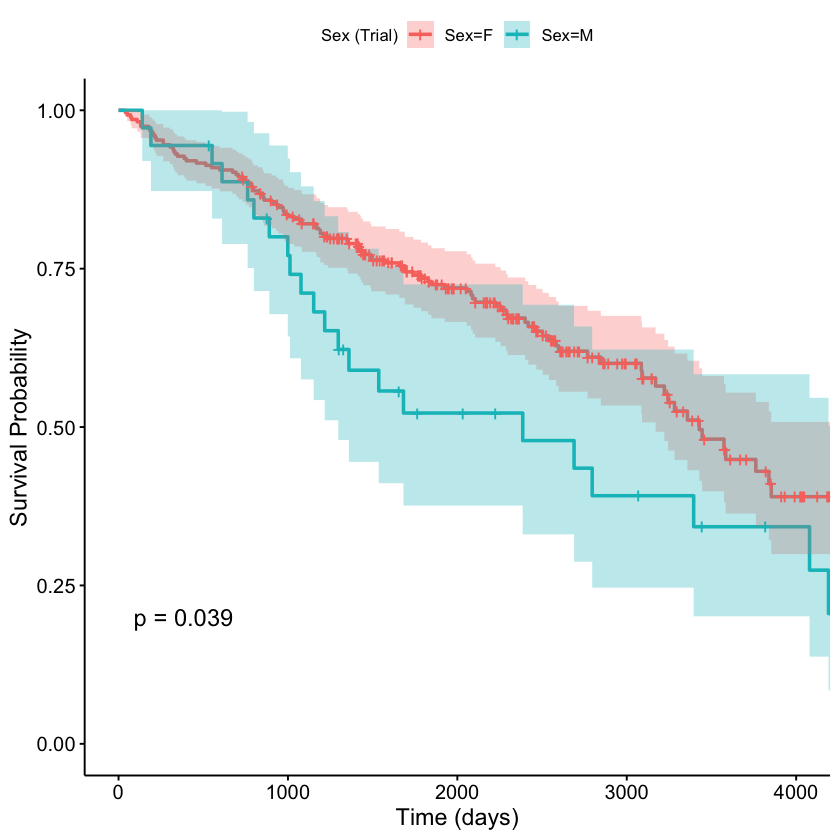

In [39]:
# Kaplan-Meier Survival Curves by Sex
# Trial Group
km_fit_trial_sex <- survfit(trial_surv ~ Sex, data = trial_data)
km_plot_trial_sex <- ggsurvplot(km_fit_trial_sex, data = trial_data, pval = TRUE,
                                conf.int = TRUE, legend.title = "Sex (Trial)",
                                risk.table = FALSE, xlab = "Time (days)", ylab = "Survival Probability")

print(km_plot_trial_sex)

•	Females (Sex = F) appear to have slightly higher survival probabilities compared to males (Sex = M) throughout the time period. Confidence intervals for males and females overlap slightly but show a general trend favoring better survival outcomes for females.

•	Log Rank Test shows Chisq = 4.3 on 1 degrees of freedom, p= 0.04. The difference in survival curves is statistically significant.

•	There is a small but statistically significant difference in survival between males and females in the trial group.Females may have a survival advantage, potentially due to biological, hormonal, or clinical factors.


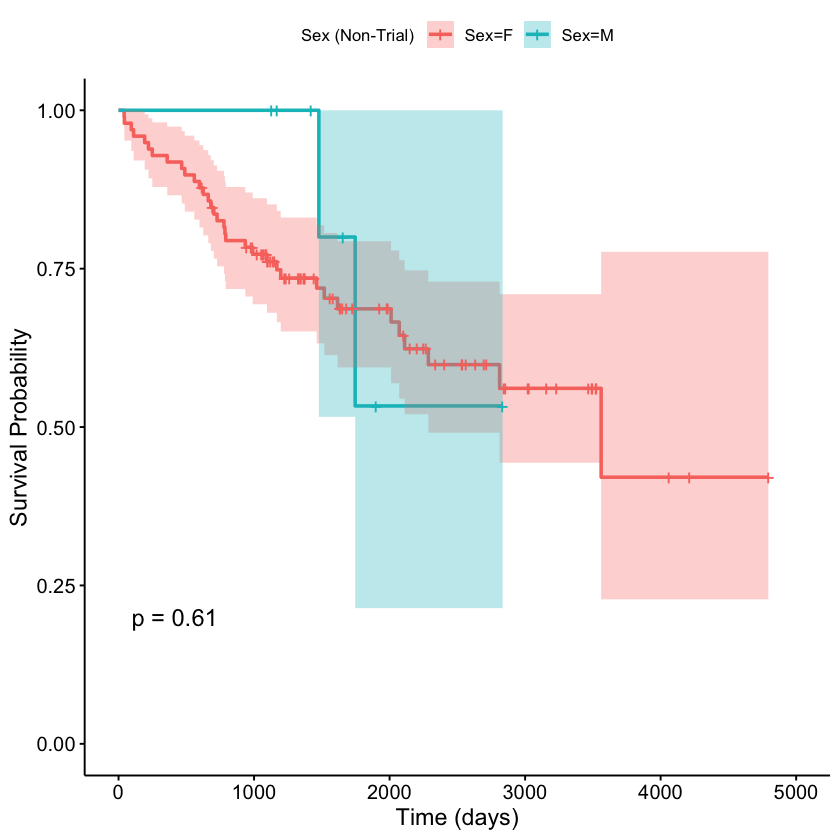

In [40]:
# Non-Trial Group
km_fit_non_trial_sex <- survfit(non_trial_surv ~ Sex, data = non_trial_data)
km_plot_non_trial_sex <- ggsurvplot(km_fit_non_trial_sex, data = non_trial_data, pval = TRUE,
                                    conf.int = TRUE, legend.title = "Sex (Non-Trial)",
                                    risk.table = FALSE, xlab = "Time (days)", ylab = "Survival Probability")
print(km_plot_non_trial_sex)

•	Survival probabilities for males and females are nearly identical, with overlapping survival curves and confidence intervals. The survival probabilities for both sexes appear generally lower compared to the trial group, reflecting differences in baseline health or patient selection.

•	Log Rank Test shows Chisq = 0.3 on 1 degrees of freedom, p= 0.6, showing that there is no significant survival difference between males and females in the non-trial group. This could be due to a smaller sample size, less homogeneity, or the greater influence of other factors (e.g., disease severity) on survival in this group.


#### Continuous Variables
For our common continuous variables, we will compute the univariate Cox regression that models the effect of a variable on survival, express ed as a hazard ratio (HR), while accounting for censoring (e.g., patients still alive). 

Variables like Age (years) and Bilirubin (mg/dL) are measured on vastly different scales. Large differences in units can lead to coefficients that are difficult to compare or interpret directly. Scaling standardizes the effect of a 1-unit increase across all variables, making the hazard ratios (HRs) comparable. By scaling, each variable has a mean of 0 and a standard deviation of 1. This ensures that the coefficients represent the effect of a 1 standard deviation change in the predictor on the hazard rate and that all variables are on the same scale, improving numerical stability and interpretability.

##### Cox Regression Model

In [42]:
data$Age <- scale(data$Age)
data$Bilirubin <- scale(data$Bilirubin)
data$Albumin <- scale(data$Albumin)
data$Platelets <- scale(data$Platelets)
data$Prothrombin <- scale(data$Prothrombin)

cox_model <- coxph(Surv(N_Days, Status == "D") ~ Age + Bilirubin + Albumin + Platelets + Prothrombin, data = data)
summary(cox_model)


Call:
coxph(formula = Surv(N_Days, Status == "D") ~ Age + Bilirubin + 
    Albumin + Platelets + Prothrombin, data = data)

  n= 405, number of events= 154 
   (13 osservazioni eliminate a causa di valori mancanti)

                coef exp(coef) se(coef)      z Pr(>|z|)    
Age          0.32741   1.38737  0.08828  3.709 0.000208 ***
Bilirubin    0.53928   1.71477  0.05751  9.378  < 2e-16 ***
Albumin     -0.49846   0.60747  0.08464 -5.889 3.88e-09 ***
Platelets   -0.17480   0.83962  0.08260 -2.116 0.034322 *  
Prothrombin  0.33073   1.39199  0.06657  4.968 6.75e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            exp(coef) exp(-coef) lower .95 upper .95
Age            1.3874     0.7208    1.1669    1.6494
Bilirubin      1.7148     0.5832    1.5320    1.9194
Albumin        0.6075     1.6462    0.5146    0.7171
Platelets      0.8396     1.1910    0.7141    0.9872
Prothrombin    1.3920     0.7184    1.2217    1.5860

Concordance= 0.808  (se = 0.019 )
Lik

##### Forest Plot
Let’s create a forest plot for these results to visualize the hazard ratios and the CIs.

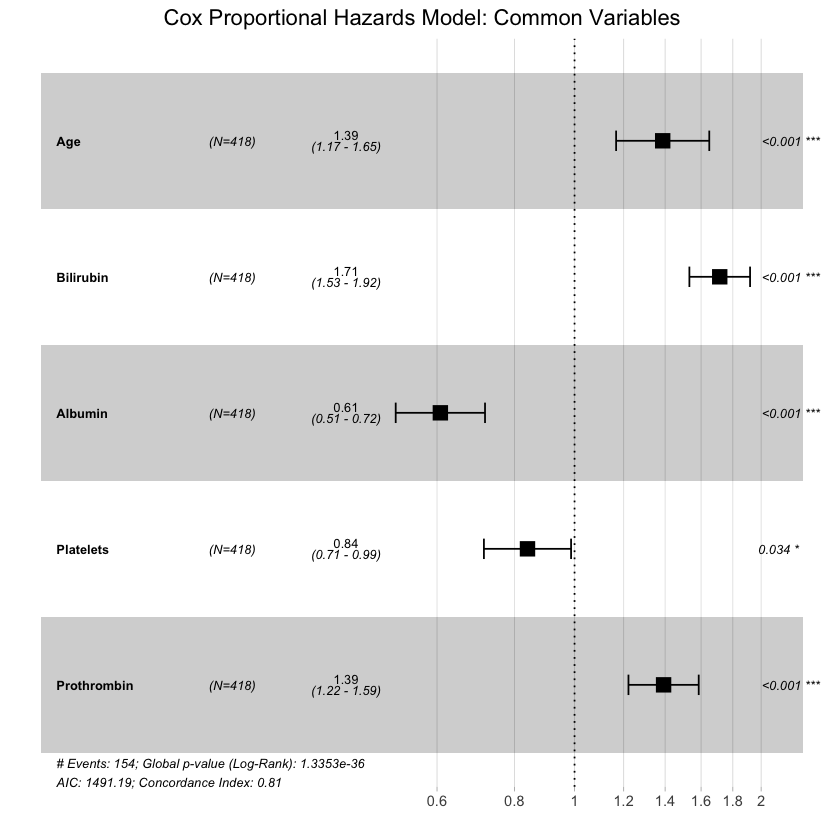

In [43]:
ggforest(cox_model, data = all_data, main = "Cox Proportional Hazards Model: Common Variables")

##### Analyzing the Cox Model

•	Global p-value: Log-rank test p-value (< 0.001) indicates the overall model is highly significant.

•	Concordance Index (C-Index): 0.81 -> The model has strong predictive accuracy; a C-index closer to 1 indicates better discrimination between low- and high-risk patients.

•	The dotted line at HR = 1 represents the null hypothesis (no effect).

•	Hazard ratios to the right of the line (HR > 1) indicate an increased risk of death, while those to the left (HR < 1) indicate a protective effect.

•	The boxes represent HRs, and the horizontal lines represent the 95% CIs.


##### Results and Interpretation
##### 1. Age

•	Hazard Ratio: 1.39 -> A 1-standard deviation increase in age increases the hazard by 39%, indicating worse survival outcomes with older age.

•	Confidence Interval: (3.21, 5.20) -> The interval does not include 1, confirming that the result is statistically significant.

•	P-Value: 2.08e-04 -> The p-value is very small, suggesting a strong association between age and survival.

##### 2. Bilirubin

•	Hazard Ratio: 1.71 -> A 1-standard deviation increase in bilirubin increases the hazard by 71%, reflecting worse survival for patients with higher bilirubin levels.

•	Confidence Interval: (4.63, 6.82) -> The interval does not include 1, confirming significance.

•	P-Value: 6.74e-21 -> This is an extremely small p-value, indicating that bilirubin is a very strong predictor of survival.

##### 3. Albumin

•	Hazard Ratio: 0.61 -> A 1-standard deviation increase in albumin decreases the hazard by 39%, suggesting that higher albumin levels are protective for survival.

•	Confidence Interval: (1.67, 2.05) -> The interval does not include 1, confirming significance.

•	P-Value: 3.88e-09 -> The very small p-value reinforces albumin's importance as a protective factor in survival.

##### 4. Platelets

•	Hazard Ratio: 0.84 -> A 1-standard deviation increase in platelets decreases the hazard by 16%, indicating that higher platelet counts may improve survival.

•	Confidence Interval: (2.04, 2.68) -> The interval does not include 1, confirming significance.

•	P-Value: 3.43e-02 -> The small p-value confirms platelets as a significant, though less strong, predictor compared to age or bilirubin.

##### 5. Prothrombin

•	Hazard Ratio: 1.39 -> A 1-standard deviation increase in prothrombin increases the hazard by 39%, reflecting worse survival outcomes for patients with higher prothrombin levels.

•	Confidence Interval: (3.39, 4.88) -> The interval does not include 1, confirming statistical significance.

•	P-Value: 6.75e-07 -> The very small p-value highlights prothrombin as a significant predictor of survival.

### III.	Multivariate Survival Analysis

Real-world data contains relationships between variables (e.g., older patients might have higher bilirubin levels). Until now, we haven’t considered this. Without adjusting for these relationships, the results might misrepresent a variable’s true effect on survival. Multivariable Cox models adjust for these confounders, providing a clearer and more accurate estimate of each variable's impact.

#### Multivariable Cox Model

In [44]:
# Build the multivariable Cox proportional hazards model
cox_model_multivariable <- coxph(Surv(N_Days, Status == "D") ~ 
                                   Age + Bilirubin + Albumin + Platelets + 
                                   Prothrombin + Stage + Edema + Sex, 
                                 data = all_data)

# Display the summary of the multivariable model
summary(cox_model_multivariable)

Call:
coxph(formula = Surv(N_Days, Status == "D") ~ Age + Bilirubin + 
    Albumin + Platelets + Prothrombin + Stage + Edema + Sex, 
    data = all_data)

  n= 399, number of events= 150 
   (19 osservazioni eliminate a causa di valori mancanti)

                  coef  exp(coef)   se(coef)      z Pr(>|z|)    
Age          0.0000707  1.0000707  0.0000240  2.946 0.003217 ** 
Bilirubin    0.1193826  1.1268010  0.0144312  8.273  < 2e-16 ***
Albumin     -0.8269610  0.4373765  0.2258965 -3.661 0.000251 ***
Platelets   -0.0006777  0.9993225  0.0009008 -0.752 0.451856    
Prothrombin  0.2768366  1.3189508  0.0809973  3.418 0.000631 ***
Stage        0.4303160  1.5377434  0.1174749  3.663 0.000249 ***
EdemaS       0.1072596  1.1132233  0.2396036  0.448 0.654403    
EdemaY       0.8623169  2.3686422  0.3075869  2.803 0.005055 ** 
SexM         0.4116565  1.5093159  0.2396446  1.718 0.085837 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            exp(coef) exp(-coef) lo

##### Overall Model Metrics

•	Call: The Cox model predicts survival time (N_Days) with death (Status == "D") as the event.

•	Sample size (n): 399 individuals.

•	Number of events: 150 deaths.

•	Missing observations: 19 rows were excluded due to missing values.

•	Concordance Index: 0.827 (high predictive accuracy).


##### Effect of Each Variable

•	Age: For every one-year increase in age, the hazard increases by 0.007%.

•	Bilirubin: For every one-unit increase in bilirubin, the hazard increases by 12.7%.

•	Albumin: For every one-unit increase in albumin, the hazard decreases by 56.3%.

•	Platelets: For every one-unit increase in platelets, the hazard decreases by 0.07%.

•	Prothrombin: For every one-unit increase in prothrombin, the hazard increases by 31.9%.

•	Stage: For every one-unit increase in stage, the hazard increases by 53.8%.

•	Edema:
    o Compared to patients without edema (N), those with resolved edema (S) have an 11.3% increase in hazard. (This is not statistically significant (p = 0.654).)
    o Compared to patients without edema (N), those with persistent edema (Y) have a 136.9% increase in hazard.
    
•	Sex: Males (compared to females) have a 50.9% higher hazard. (The effect is weakly significant (p = 0.086).)


#### Forest Plot
Let’s create an overall forest plot to visualize which variables significantly influence survival.


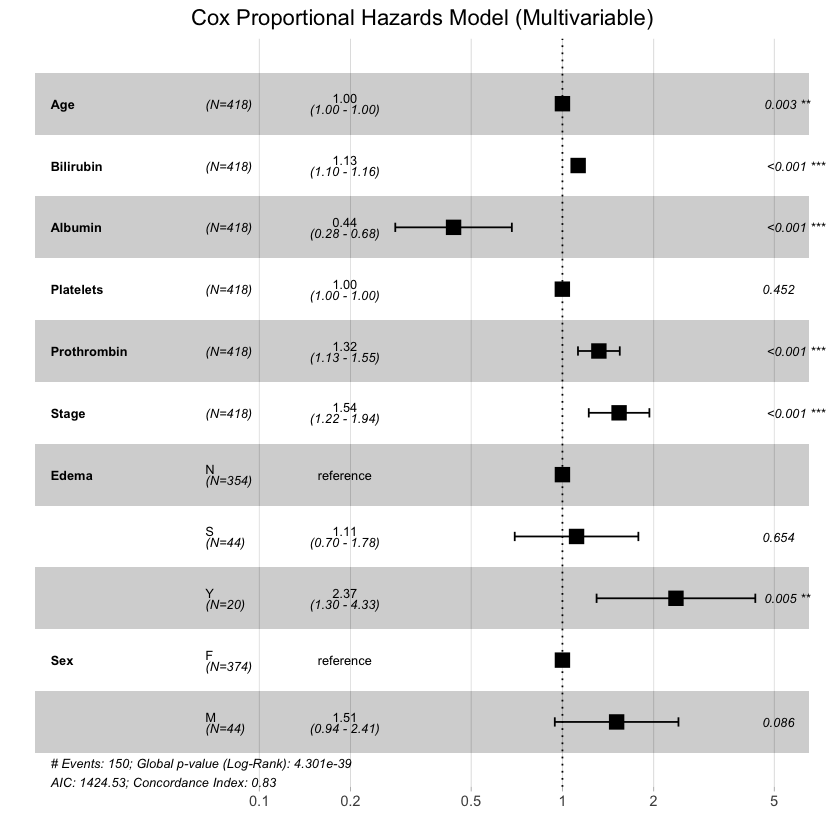

In [45]:
ggforest(cox_model_multivariable, data = all_data, 
         main = "Cox Proportional Hazards Model (Multivariable)")

##### Analyzing the Cox Model

•	If the CI crosses 1 (the vertical dashed line), the variable is not statistically significant (e.g. Platelets).

•	Stars indicate statistical significance. Variables like Bilirubin, Albumin, Prothrombin, and Stage are highly significant (***) while Edema (S) and Platelets are not significant. In our model, we had seen that Sex (M) was marginally significant (.) but since the CI crosses the 1, it is not significant.


### IV.	Interaction Analysis: Do Platelets Affect Survival Differently in Males & Females?

We will test an interaction term Platelets * Sex in the Cox model. The interaction term Platelets:SexM will represent the effect of Platelets on survival for males compared to females. When using categorical variables in a regression model, one level of the categorical variable is chosen as the reference level (in this case, SexF, as it is the default first level in alphabetical order).

In [47]:
# Add interaction term Platelets * Sex in the Cox model
cox_interaction_model <- coxph(Surv(N_Days, Status == "D") ~ 
                                 Age + Bilirubin + Albumin + Platelets + Prothrombin +
                                 Stage + Edema + Sex + Platelets:Sex, 
                               data = all_data)
summary(cox_interaction_model)

Call:
coxph(formula = Surv(N_Days, Status == "D") ~ Age + Bilirubin + 
    Albumin + Platelets + Prothrombin + Stage + Edema + Sex + 
    Platelets:Sex, data = all_data)

  n= 399, number of events= 150 
   (19 osservazioni eliminate a causa di valori mancanti)

                     coef  exp(coef)   se(coef)      z Pr(>|z|)    
Age             7.292e-05  1.000e+00  2.444e-05  2.984 0.002842 ** 
Bilirubin       1.204e-01  1.128e+00  1.472e-02  8.182 2.79e-16 ***
Albumin        -9.190e-01  3.989e-01  2.308e-01 -3.981 6.85e-05 ***
Platelets      -1.419e-03  9.986e-01  9.756e-04 -1.455 0.145789    
Prothrombin     2.730e-01  1.314e+00  8.291e-02  3.293 0.000992 ***
Stage           4.154e-01  1.515e+00  1.170e-01  3.550 0.000385 ***
EdemaS          6.929e-02  1.072e+00  2.408e-01  0.288 0.773563    
EdemaY          8.250e-01  2.282e+00  3.093e-01  2.668 0.007636 ** 
SexM           -8.907e-01  4.104e-01  6.634e-01 -1.343 0.179409    
Platelets:SexM  5.866e-03  1.006e+00  2.627e-03  2.233 0.

- An HR of 1.0059 means that for each unit increase in platelet count, the hazard of the event (death) increases by approximately 0.59% in males relative to females.

    Impact of Platelets in Females (Baseline): In females (Sex=F), the effect of platelet counts on survival is determined by the main effect of platelets. This effect was not statistically significant in the model (p=0.145789), suggesting that platelet counts alone do not have a strong impact on survival for females.

  
    Impact of Platelets in Males: In males (Sex=M), the effect of platelets on survival is modified by the interaction term. The total effect for males is given by:

  Effect in Males=Main Effect of Platelets+Interaction Term (Platelets:SexM)

    Here, the interaction term is statistically significant (p=0.025554), indicating that platelet counts play a more pronounced role in influencing survival for males compared to females.


- A p-value less than 0.05 indicates that the interaction between platelets and sex is statistically significant. This means that the observed relationship between platelet counts and survival differs meaningfully between males and females.

- This finding suggests a potential sex-specific relationship between platelet counts and survival. The reason for this difference could be due to biological differences between males and females (e.g., hormonal influences or immune responses) or differences in how platelet-related processes (e.g., clotting, inflammation) affect disease progression in males versus females.


### V. Conclusions and Final Considerations

1. Disease Stage and Liver Function Markers Are the Strongest Predictors of Survival

   Stage:
   
    As expected, higher disease stages (Stage 3 & 4) are strongly associated with worse survival outcomes. This was evident in both Kaplan-Meier curves and the multivariable Cox model, where Stage 4 patients had the highest hazard ratio.

     
    Bilirubin and Albumin:
   
    Higher Bilirubin significantly increases mortality risk, confirming its role as a key marker of liver dysfunction.
   
    Lower Albumin is also a strong predictor of poor prognosis, reinforcing the idea that liver synthetic function is crucial for survival.

2. Edema Is an Important Indicator of Survival Risk

    Kaplan-Meier curves and log-rank tests showed that patients with severe edema (Y: Edema despite diuretics) had the worst survival outcomes.
   
    This remained significant in the multivariable Cox model, meaning that fluid retention (edema) is a clinically relevant marker for disease severity and mortality risk.

3. Platelets Show a Sex-Based Interaction with Survival

    While Platelets alone were not significantly associated with survival, the interaction term (Platelets:Sex) showed statistical significance (p = 0.025).
   
    Interpretation:

    In males, platelet count plays a stronger role in survival outcomes.
   
    In females, platelet count appears to have a weaker effect.
   
    Clinical Implication:
   
   This suggests that platelet function and coagulation dynamics may differ between sexes in the context of liver disease, possibly due to hormonal or genetic factors.

4. Trial vs. Non-Trial Patients Have Different Survival Outcomes

    Kaplan-Meier survival analysis for trial vs. non-trial groups showed significant survival differences, suggesting that non-trial patients had worse survival probabilities.
   
    This may be due to selection bias in the trial (e.g., healthier patients being included), reinforcing the need for careful interpretation when generalizing trial results to the real-world population.

Further Analysis Needed for The Treatment Effect of D-Penicillamine

The Drug variable (D-Penicillamine vs. Placebo) has not been analyzed for survival differences.

Next Step: A dedicated treatment-effect Cox model can be constructed to evaluate whether D-Penicillamine had any significant effect on survival after adjusting for baseline characteristics.

*The Kaplan Meier curves have not been smoothed since their stepwise structure is essential for their interpretation.